In [1]:
%reload_ext autoreload
%autoreload 2

import logging
import numpy as np

# Make analysis reproducible
np.random.seed(0)

# Enable logging
logging.basicConfig(level=logging.INFO)

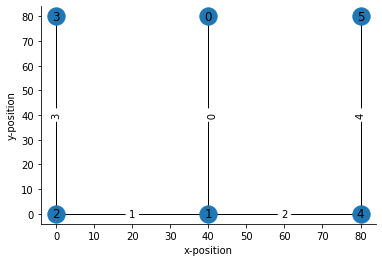

In [2]:
from replay_trajectory_classification import make_track_graph, plot_track_graph
import matplotlib.pyplot as plt

node_positions = [(40, 80), # 0
                  (40, 0),  # 1
                  (0, 0),   # 2
                  (0, 80),  # 3
                  (80, 0),  # 4
                  (80, 80), # 5
                 ]

edges = [(0, 1),
         (1, 2),
         (2, 3),
         (1, 4),
         (4, 5)
        ]

track_graph1 = make_track_graph(node_positions, edges)

fig, ax = plt.subplots()
plot_track_graph(track_graph1, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

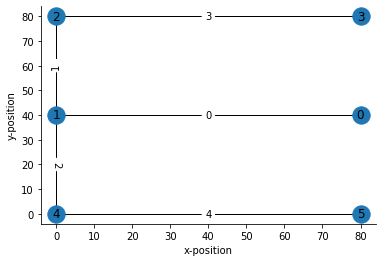

In [3]:
node_positions = [(80, 40),
                  (0, 40),
                  (0, 80),
                  (80, 80),
                  (0, 0),
                  (80, 0),
                 ]

edges = [(0, 1),
         (1, 2),
         (2, 3),
         (1, 4),
         (4, 5)
        ]

track_graph2 = make_track_graph(node_positions, edges)

fig, ax = plt.subplots()
plot_track_graph(track_graph2, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

In [4]:
track_graph1.edges

EdgeView([(0, 1), (1, 2), (1, 4), (2, 3), (4, 5)])

In [5]:
track_graph2.edges

EdgeView([(0, 1), (1, 2), (1, 4), (2, 3), (4, 5)])

In [6]:
traversal_path = [(0, 1), (1, 2), (2, 3), (3, 2), (2, 1), (1, 0), (0, 1), (1, 4), (4, 5), (5, 4), (4, 1), (1, 0)]

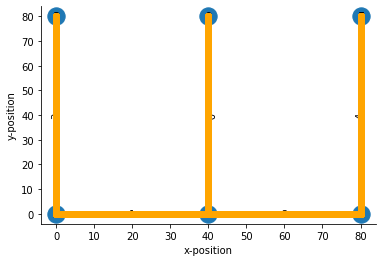

In [7]:
def generate_position(traversal_path, track_graph, step_size=0.020, n_traversals=10):
    points = []
    for _ in range(n_traversals):
        for node1, node2 in traversal_path:
            x1, y1 = track_graph.nodes[node1]['pos']
            x2, y2 = track_graph.nodes[node2]['pos']
            dx, dy = x2 - x1, y2 - y1
            dist = np.sqrt(dx**2 + dy**2)
            n_points = int(dist // step_size)
            w = np.linspace(0, 1, n_points)
            points.append((x1 + dx * w, y1 + dy * w))

    return np.concatenate(points, axis=1).T

position1 = generate_position(traversal_path, track_graph1)

fig, ax = plt.subplots()
plot_track_graph(track_graph1, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(position1[:, 0], position1[:, 1], zorder=10, color='orange')

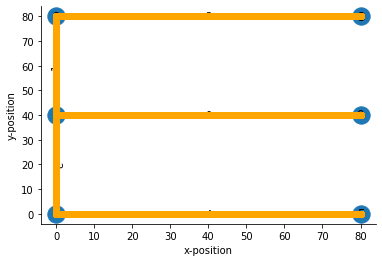

In [8]:
position2 = generate_position(traversal_path, track_graph2)

fig, ax = plt.subplots()
plot_track_graph(track_graph2, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(position2[:, 0], position2[:, 1], zorder=10, color='orange')

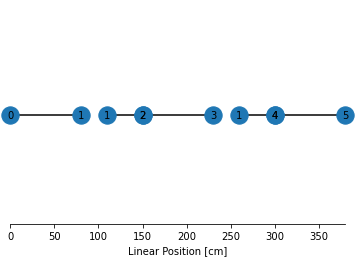

In [9]:
from replay_trajectory_classification import plot_graph_as_1D

edge_order = [(0, 1),
              (1, 2),
              (2, 3),
              (1, 4),
              (4, 5)
             ]
edge_spacing = [30, 0, 30, 0, 0, 0]
plot_graph_as_1D(track_graph1, edge_order, edge_spacing)

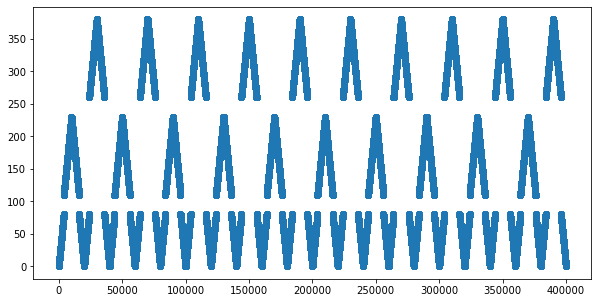

In [10]:
from track_linearization import get_linearized_position

position_df1 = get_linearized_position(position1,
                                      track_graph1,
                                      edge_order=edge_order,
                                      edge_spacing=edge_spacing,
                                      use_HMM=False)
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(position_df1.shape[0]), position_df1.linear_position)

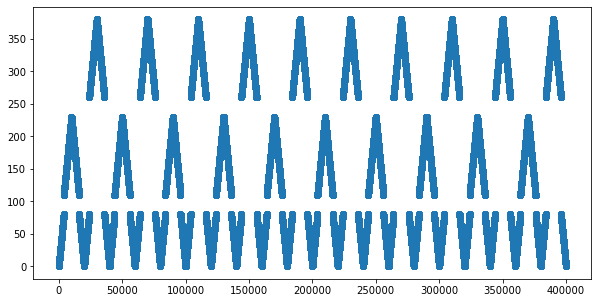

In [11]:
position_df2 = get_linearized_position(position2,
                                      track_graph2,
                                      edge_order=edge_order,
                                      edge_spacing=edge_spacing,
                                      use_HMM=False)
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(position_df2.shape[0]), position_df2.linear_position)

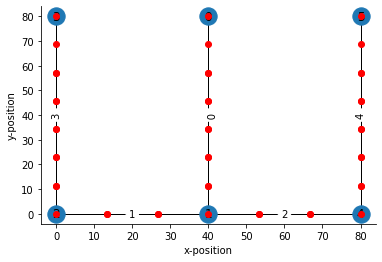

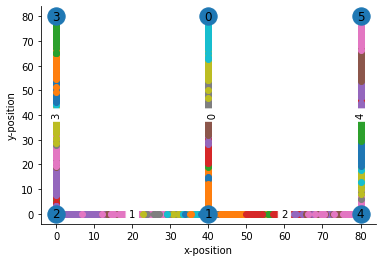

In [12]:
from replay_trajectory_classification.simulate import simulate_neuron_with_place_field

sampling_frequency = 1000

place_field_centers = generate_position(traversal_path, track_graph1, step_size=10, n_traversals=1)
place_field_centers = np.unique(place_field_centers, axis=0)

fig, ax = plt.subplots()
plot_track_graph(track_graph1, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(place_field_centers[:, 0], place_field_centers[:, 1], zorder=10, color='red')


spikes1 = np.stack([simulate_neuron_with_place_field(center, position1,
                                                    sampling_frequency=sampling_frequency,
                                                    variance=6.0**2)
                   for center in place_field_centers], axis=1)

fig, ax = plt.subplots()
plot_track_graph(track_graph1, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

for spike in spikes1.T:
    spike_ind = np.nonzero(spike)[0]
    ax.scatter(position1[spike_ind, 0], position1[spike_ind, 1])

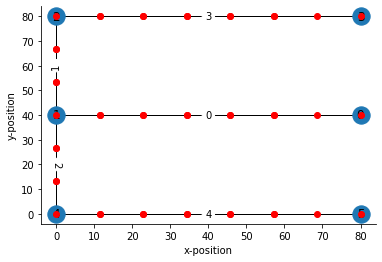

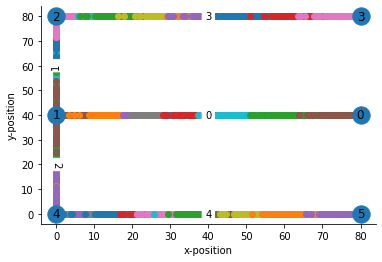

In [13]:
from replay_trajectory_classification.simulate import simulate_neuron_with_place_field

sampling_frequency = 1000

place_field_centers = generate_position(traversal_path, track_graph2, step_size=10, n_traversals=1)
place_field_centers = np.unique(place_field_centers, axis=0)

fig, ax = plt.subplots()
plot_track_graph(track_graph2, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(place_field_centers[:, 0], place_field_centers[:, 1], zorder=10, color='red')


spikes2 = np.stack([simulate_neuron_with_place_field(center, position2,
                                                    sampling_frequency=sampling_frequency,
                                                    variance=6.0**2)
                   for center in place_field_centers], axis=1)

fig, ax = plt.subplots()
plot_track_graph(track_graph2, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

for spike in spikes2.T:
    spike_ind = np.nonzero(spike)[0]
    ax.scatter(position2[spike_ind, 0], position2[spike_ind, 1])

In [65]:
from replay_trajectory_classification.simulate import simulate_neuron_with_place_field
from track_linearization import get_linearized_position
from replay_trajectory_classification import make_track_graph
import numpy as np


def generate_position(traversal_path, track_graph, step_size=0.020, n_traversals=10):
    points = []
    for _ in range(n_traversals):
        for node1, node2 in traversal_path:
            x1, y1 = track_graph.nodes[node1]['pos']
            x2, y2 = track_graph.nodes[node2]['pos']
            dx, dy = x2 - x1, y2 - y1
            dist = np.sqrt(dx**2 + dy**2)
            n_points = int(dist // step_size)
            w = np.linspace(0, 1, n_points)
            points.append((x1 + dx * w, y1 + dy * w))

    return np.concatenate(points, axis=1).T

def make_two_environment_data():
    node_positions1 = [(40, 80), # 0
                       (40, 0),  # 1
                       (0, 0),   # 2
                       (0, 80),  # 3
                       (80, 0),  # 4
                       (80, 80), # 5
                       ]

    node_positions2 = [(80, 40),
                       (0, 40),
                       (0, 80),
                       (80, 80),
                       (0, 0),
                       (80, 0),
                       ]
    edges = [(0, 1),
             (1, 2),
             (2, 3),
             (1, 4),
             (4, 5)
            ]

    track_graph1 = make_track_graph(node_positions1, edges)
    track_graph2 = make_track_graph(node_positions2, edges)
    
    traversal_path = [(0, 1), (1, 2), (2, 3), (3, 2), (2, 1), (1, 0), (0, 1), (1, 4), (4, 5), (5, 4), (4, 1), (1, 0)]
    position1 = generate_position(traversal_path, track_graph1)
    position2 = generate_position(traversal_path, track_graph2)
    
    edge_order = ((0, 1),
                  (1, 2),
                  (2, 3),
                  (1, 4),
                  (4, 5)
                 )
    edge_spacing = (30, 0, 30, 0)
    position_df1 = get_linearized_position(position1,
                                           track_graph1,
                                           edge_order=edge_order,
                                           edge_spacing=edge_spacing,
                                           use_HMM=False)
    position_df2 = get_linearized_position(position2,
                                          track_graph2,
                                          edge_order=edge_order,
                                          edge_spacing=edge_spacing,
                                          use_HMM=False)
    
    sampling_frequency = 1000

    place_field_centers1 = generate_position(traversal_path, track_graph1, step_size=10, n_traversals=1)
    place_field_centers1 = np.unique(place_field_centers1, axis=0)
    
    spikes1 = np.stack([simulate_neuron_with_place_field(center, position1,
                                                        sampling_frequency=sampling_frequency,
                                                        variance=6.0**2)
                       for center in place_field_centers1], axis=1)
    
    place_field_centers2 = generate_position(traversal_path, track_graph2, step_size=10, n_traversals=1)
    place_field_centers2 = np.unique(place_field_centers2, axis=0)
    
    spikes2 = np.stack([simulate_neuron_with_place_field(center, position2,
                                                    sampling_frequency=sampling_frequency,
                                                    variance=6.0**2)
                   for center in place_field_centers2], axis=1)
    
    return (spikes1, spikes2,
            position_df1, position_df2,
            track_graph1, track_graph2, 
            place_field_centers1, place_field_centers2,
            position1, position2,
            edge_order, edge_spacing
           )

(spikes1, spikes2,
 position_df1, position_df2,
 track_graph1, track_graph2, 
 place_field_centers1, place_field_centers2,
 position1, position2,
 edge_order, edge_spacing
) = make_two_environment_data()

| Likelihood       |
|------------------|
| env1, continuous |
| env2, continuous |



|                       | env1, continuous  | env2, continuous  |
|-----------------------|-------------------|-------------------|
| **env1, continuous**  | random walk, env1 | uniform           |
| **env2, continuous**  | uniform           | random walk, env2 |


+ Change text inputs for continuous_transition_types to classes

In [172]:
from replay_trajectory_classification.bins import (atleast_2d, get_centers,
                                                   get_grid, get_track_grid,
                                                   get_track_interior)
from dataclasses import dataclass
import networkx as nx
import matplotlib.pyplot as plt

@dataclass
class Environment:
    environment_name: str = None
    place_bin_size: float = 2.0
    track_graph: nx.Graph = None
    edge_order: tuple = None
    edge_spacing: tuple = None
    is_track_interior: np.ndarray = None
    position_range: np.ndarray = None
    infer_track_interior: bool = True
    
    def fit_place_grid(self, position=None, infer_track_interior=True):
        if self.track_graph is None:
            (self.edges_,
             self.place_bin_edges_,
             self.place_bin_centers_,
             self.centers_shape_
            ) = get_grid(position, self.place_bin_size, self.position_range,
                         self.infer_track_interior)

            self.infer_track_interior = infer_track_interior

            if self.is_track_interior is None and self.infer_track_interior:
                self.is_track_interior_ = get_track_interior(
                    position, self.edges_)
            elif is_track_interior is None and not self.infer_track_interior:
                self.is_track_interior_ = np.ones(
                    self.centers_shape_, dtype=np.bool)
        else:
            (
                self.place_bin_centers_,
                self.place_bin_edges_,
                self.is_track_interior_,
                self.distance_between_nodes_,
                self.centers_shape_,
                self.edges_,
                self.track_graph_with_bin_centers_edges_,
                self.original_nodes_df_,
                self.place_bin_edges_nodes_df_,
                self.place_bin_centers_nodes_df_,
                self.nodes_df_
            ) = get_track_grid(self.track_graph, self.edge_order,
                               self.edge_spacing, self.place_bin_size)

        return self
    
    def plot_grid(self, ax=None):
        if self.track_graph is not None:
            if ax is None:
                fig, ax = plt.subplots(figsize=(15, 2))

            plot_graph_as_1D(self.track_graph, self.edge_order,
                             self.edge_spacing, ax=ax)
            for edge in self.edges_[0]:
                ax.axvline(edge.squeeze(), linewidth=0.5, color='black')
            ax.set_ylim((0, 0.1))
        else:
            if ax is None:
                fig, ax = plt.subplots(figsize=(6, 7))
            ax.pcolormesh(self.edges_[0], self.edges_[1], self.is_track_interior_.T,
                          cmap='bone_r')
            ax.set_xticks(self.edges_[0], minor=True)
            ax.set_yticks(self.edges_[1], minor=True)
            ax.grid(True, which='both')


env1 = Environment(environment_name='w_track1',
                  place_bin_size=2.0,
                  track_graph=track_graph1,
                  edge_spacing=edge_spacing,
                  edge_order=edge_order)
env1.fit_place_grid(position_df1.linear_position)

env2 = Environment(environment_name='w_track2',
                   place_bin_size=2.0,
                   track_graph=track_graph2,
                   edge_spacing=edge_spacing,
                   edge_order=edge_order)
env2.fit_place_grid(position_df2.linear_position)

env1, env2

(Environment(environment_name='w_track1', place_bin_size=2.0, track_graph=<networkx.classes.graph.Graph object at 0x14c551e80>, edge_order=((0, 1), (1, 2), (2, 3), (1, 4), (4, 5)), edge_spacing=(30, 0, 30, 0), is_track_interior=None, position_range=None, infer_track_interior=True),
 Environment(environment_name='w_track2', place_bin_size=2.0, track_graph=<networkx.classes.graph.Graph object at 0x14c5513d0>, edge_order=((0, 1), (1, 2), (2, 3), (1, 4), (4, 5)), edge_spacing=(30, 0, 30, 0), is_track_interior=None, position_range=None, infer_track_interior=True))

In [177]:
from replay_trajectory_classification.state_transition import _normalize_row_probability, atleast_2d
from scipy.stats import multivariate_normal
import numpy as np

def _random_walk_on_track_graph(
    place_bin_centers, movement_var,
    place_bin_center_ind_to_node,
    distance_between_nodes
):
    state_transition = np.zeros(
        (place_bin_centers.size, place_bin_centers.size))
    gaussian = multivariate_normal(mean=0, cov=movement_var)

    for bin_ind1, node1 in enumerate(place_bin_center_ind_to_node):
        for bin_ind2, node2 in enumerate(place_bin_center_ind_to_node):
            try:
                state_transition[bin_ind1, bin_ind2] = gaussian.pdf(
                    distance_between_nodes[node1][node2]
                )
            except KeyError:
                # bins not on track interior will be -1 and not in distance
                # between nodes
                continue

    return state_transition

@dataclass
class RandomWalk:
    environment_name: str = None
    movement_var: float = 6.0
        
    def make_state_transition(self, environments: dict):
        self.environment = environments[self.environment_name]

        if self.environment.track_graph is None:
            transition_matrix = np.stack(
                [multivariate_normal(
                    mean=center, cov=self.movement_var).pdf(
                    place_bin_centers)
                 for center in self.environment.place_bin_centers_], axis=1)
        else:
            place_bin_center_ind_to_node = np.asarray(
                self.environment.place_bin_centers_nodes_df_.node_id)
            transition_matrix = _random_walk_on_track_graph(
                self.environment.place_bin_centers_,
                self.movement_var,
                place_bin_center_ind_to_node,
                self.environment.distance_between_nodes_
            )

        is_track_interior = self.environment.is_track_interior_.ravel(order='F')
        transition_matrix[~is_track_interior] = 0.0
        transition_matrix[:, ~is_track_interior] = 0.0

        self.state_transition_ = _normalize_row_probability(transition_matrix)

        return self.state_transition_

@dataclass
class Uniform:
    environment_name: str
    environment2_name: str = None

    def make_state_transition(self, environments):
        self.environment1 = environments[self.environment_name]
        n_bins1 = self.environment1.place_bin_centers_.shape[0]
        is_track_interior1 = self.environment1.is_track_interior_.ravel(order='F')
        
        if self.environment2_name is None:
            n_bins2 = n_bins1
            is_track_interior2 = is_track_interior1.copy()
        else:
            self.environment2 = environments[self.environment2_name]
            n_bins2 = self.environment2.place_bin_centers_.shape[0]
            is_track_interior2 = self.environment2.is_track_interior_.ravel(order='F')

        transition_matrix = np.ones((n_bins1, n_bins2))

        transition_matrix[~is_track_interior1] = 0.0
        transition_matrix[:, ~is_track_interior2] = 0.0

        return _normalize_row_probability(transition_matrix)

@dataclass
class Identity:
    environment_name: str = None
        
    def make_state_transition(self, environments: dict):
        self.environment = environments[self.environment_name]
        n_bins = self.environment.place_bin_centers_.shape[0]
        
        transition_matrix = np.identity(n_bins)

        is_track_interior = self.environment.is_track_interior_.ravel(order='F')
        transition_matrix[~is_track_interior] = 0.0
        transition_matrix[:, ~is_track_interior] = 0.0

        return _normalize_row_probability(transition_matrix)

@dataclass
class EmpiricalMovement:
    environment_name: str = None
    speedup: int = 20

    def make_state_transition(self, environments, position, is_training=None):
        self.environment = environments[self.environment_name]
        
        if is_training is None:
            is_training = np.ones((position.shape[0]), dtype=np.bool)

        position = atleast_2d(position)[is_training]
        state_transition, _ = np.histogramdd(
            np.concatenate((position[1:], position[:-1]), axis=1),
            bins=self.environment.edges_ * 2, range=self.environment.position_range)
        original_shape = state_transition.shape
        n_position_dims = position.shape[1]
        shape_2d = np.product(original_shape[:n_position_dims])
        state_transition = _normalize_row_probability(
            state_transition.reshape((shape_2d, shape_2d), order='F'))
        return np.linalg.matrix_power(state_transition, self.speedup)
    

@dataclass
class RandomWalkDirection1():
    environment_name: str = None
    movement_var: float = 6.0

    def make_state_transition(self, environments: dict):
        random = (RandomWalk(self.environment_name, self.movement_var)
                  .make_state_transition(environments))
        return _normalize_row_probability(np.triu(random))


@dataclass
class RandomWalkDirection2():
    environment_name: str = None
    movement_var: float = 6.0

    def make_state_transition(self, environments: dict):
        random = (RandomWalk(self.environment_name, self.movement_var)
                  .make_state_transition(environments))
        return _normalize_row_probability(np.tril(random))


In [179]:
environments = {'w_track1': env1, 'w_track2': env2}
RandomWalk(environment_name='w_track2').make_state_transition(environments)
Uniform(environment_name='w_track1').make_state_transition(environments)
Identity(environment_name='w_track2').make_state_transition(environments)
EmpiricalMovement(environment_name='w_track2').make_state_transition(environments, position_df2.linear_position)

RandomWalkDirection1(environment_name='w_track2').make_state_transition(environments)

array([[0.49140289, 0.35210556, 0.1295324 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.49140289, 0.35210556, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.49140289, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.50501774, 0.36186103,
        0.13312123],
       [0.        , 0.        , 0.        , ..., 0.        , 0.58257021,
        0.41742979],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [176]:
RandomWalkDirection1().make_state_transition(environments)

KeyError: None

In [171]:
None == None

True

In [161]:
[Identity(environment_name='w_track2'), Identity(environment_name='w_track2'), RandomWalk(environment_name='w_track2')]

[Identity(environment_name='w_track2'),
 Identity(environment_name='w_track2'),
 RandomWalk(environment_name='w_track2', movement_var=6.0)]

In [213]:
from dataclasses import dataclass

import numpy as np


@dataclass
class DiagonalDiscrete:
    diagonal_value: float = 0.98

    def make_state_transition(self, n_states):
        strong_diagonal = np.identity(n_states) * self.diagonal_value
        is_off_diag = ~np.identity(n_states, dtype=bool)
        strong_diagonal[is_off_diag] = (
            (1 - self.diagonal_value) / (n_states - 1))

        self.state_transition_ = strong_diagonal
        return self.state_transition_


@dataclass
class UniformDiscrete:
    def make_state_transition(self, n_states):
        self.state_transition_ = np.ones((n_states, n_states)) / n_states

        return self.state_transition_


@dataclass
class RandomDiscrete:
    def make_state_transition(self, n_states):
        state_transition = np.random.rand(n_states, n_states)
        state_transition /= state_transition.sum(axis=1, keepdims=True)

        self.state_transition_ = state_transition
        return self.state_transition_


UniformDiscrete().make_state_transition(3), DiagonalDiscrete(0.4).make_state_transition(3),  RandomDiscrete().make_state_transition(3)

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[0.4, 0.3, 0.3],
        [0.3, 0.4, 0.3],
        [0.3, 0.3, 0.4]]),
 array([[0.58108445, 0.32211675, 0.0967988 ],
        [0.58497236, 0.14174199, 0.27328565],
        [0.32193895, 0.36929776, 0.30876329]]))

In [192]:
DiagonalDiscrete(1/5).make_state_transition(5)

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [235]:
from replay_trajectory_classification.continuous_state_transitions import RandomWalk, Uniform
from replay_trajectory_classification.discrete_state_transitions import DiagonalDiscrete

continuous_state_transition_types = [[RandomWalk('w_track1', 6.0), Uniform('w_track1', 'w_track2')],
                                     [Uniform('w_track2', 'w_track1'), RandomWalk('w_track2', 6.0)]]

environments = {'w_track1': env1, 'w_track2': env2}
continuous_state_transition = [[ct.make_state_transition(environments) for ct in ct1]
                                for ct1 in continuous_state_transition_types]

discrete_state_transition = DiagonalDiscrete(0.98).make_state_transition(n_states=2)
discrete_state_transition

array([[0.98, 0.02],
       [0.02, 0.98]])

In [247]:
@dataclass
class UniformInitialConditions:
    environment_names: tuple
        
    def make_initial_conditions(self, environments):
        n_total_place_bins = 0
        initial_conditions = []
        
        for environment_name in self.environment_names:
            environment = environments[environment_name]
            n_place_bins = environment.is_track_interior_.sum()
            n_total_place_bins += n_place_bins
            initial_conditions.append(environment.is_track_interior_)
        
        return [ic / n_total_place_bins for ic in initial_conditions]

initial_conditions = UniformInitialConditions(('w_track1', 'w_track2')).make_initial_conditions(environments)
initial_conditions

[array([0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.      , 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 0.003125, 0.003125,
        0.003125, 0.003125, 0.003125, 0.003125, 

In [290]:
from replay_trajectory_classification.spiking_likelihood import estimate_place_fields

environment_names_to_state = ('w_track1', 'w_track1', 'w_track1', 'w_track1')
encoding_groups_to_state =   ('Inbound', 'Inbound', 'Outbound', 'Outbound')

states = tuple(zip(environment_names_to_state, encoding_groups_to_state))

n_time = position_df1.linear_position.values.shape[0]
is_training1 = np.ones((n_time,), dtype=bool)
encoding_group_labels1 = np.concatenate((np.asarray(['Outbound'] * (n_time//2)), np.asarray(['Inbound'] * (n_time - (n_time//2)))))

n_time = position_df2.linear_position.values.shape[0]
is_training2 = np.ones((n_time,), dtype=bool)
encoding_group_labels2 = np.asarray(['Inbound'] * n_time)

data = {'w_track1': (position_df1.linear_position.values[:, np.newaxis], spikes1, is_training1, encoding_group_labels1),
        'w_track2': (position_df2.linear_position.values[:, np.newaxis], spikes2, is_training2, encoding_group_labels2),
        }

place_fields = {}
for environment_name, encoding_group in set(states):
    print(environment_name, encoding_group)
    environment = environments[environment_name]
    position, spikes, is_training, encoding_group_labels = data[environment_name]
    place_fields[(environment_name, encoding_group)] = estimate_place_fields(
        position=position[is_training & (encoding_group_labels == encoding_group)],
        spikes=spikes[is_training & (encoding_group_labels == encoding_group)],
        place_bin_centers=environment.place_bin_centers_,
        place_bin_edges=environment.place_bin_edges_,
        penalty=1E1,
        knot_spacing=10)
    
place_fields

w_track1 Outbound
w_track1 Inbound


{('w_track1',
  'Outbound'): <xarray.DataArray (position: 162, neuron: 47)>
 array([[0.00031373, 0.00033385, 0.00035523, ..., 0.00031344, 0.0003051 ,
         0.00024565],
        [0.00030206, 0.00032079, 0.0003406 , ..., 0.00030173, 0.00029414,
         0.00024004],
        [0.00029186, 0.00030939, 0.00032784, ..., 0.00029148, 0.00028454,
         0.00023507],
        ...,
        [0.00031653, 0.0003369 , 0.00035856, ..., 0.00037908, 0.00331782,
         0.00429532],
        [0.00032293, 0.00034414, 0.00036674, ..., 0.00034569, 0.00183045,
         0.00400511],
        [0.00033014, 0.00035229, 0.00037598, ..., 0.00032818, 0.00094514,
         0.00351159]])
 Coordinates:
   * position  (position) float64 1.0 3.0 5.0 7.0 9.0 ... 373.0 375.0 377.0 379.0
 Dimensions without coordinates: neuron,
 ('w_track1',
  'Inbound'): <xarray.DataArray (position: 162, neuron: 47)>
 array([[0.00033373, 0.00033628, 0.00034614, ..., 0.00029239, 0.00030304,
         0.00023406],
        [0.00032067, 0.000

In [287]:
encoding_group

'Inbound'

In [286]:
encoding_group_labels

array(['Outbound', 'Outbound', 'Outbound', ..., 'Outbound', 'Outbound',
       'Outbound'], dtype='<U8')

In [ ]:
def fit_place_fields(self, position, spikes, is_training=None,
                     encoding_group_labels=None,
                     encoding_group_to_state=None):
    logger.info('Fitting place fields...')
    if is_training is None:
        n_time = position.shape[0]
        is_training = np.ones((n_time,), dtype=np.bool)

    if encoding_group_labels is None:
        n_time = position.shape[0]
        encoding_group_labels = np.zeros((n_time,), dtype=np.int32)

    if encoding_group_to_state is None:
        n_states = len(self.continuous_transition_types)
        self.encoding_group_to_state_ = np.zeros(
            (n_states,), dtype=np.int32)
    else:
        self.encoding_group_to_state_ = np.asarray(encoding_group_to_state)

    is_training = np.asarray(is_training).squeeze()
    self.place_fields_ = []
    unique_labels = np.unique(encoding_group_labels[is_training])
    for encoding_group in unique_labels:
        self.place_fields_.append(estimate_place_fields(
            position=position[is_training & (
                encoding_group_labels == encoding_group)],
            spikes=spikes[is_training & (
                encoding_group_labels == encoding_group)],
            place_bin_centers=self.place_bin_centers_,
            place_bin_edges=self.place_bin_edges_,
            penalty=self.spike_model_penalty,
            knot_spacing=self.knot_spacing))